### **Assignment #4**

In this assignment, you will learn about decision/regression trees.
You learned about decision/regression trees in your previous courses. You should renew your knowledge by watching: https://www.youtube.com/watch?v=g9c66TUylZ4

Implement the regression tree algorithm from scratch. For the splitting criteria use a criteria of your choice. The residual sum of squares is usually used as the splitting criteria in regression trees.

Select a criteria of your choice to stop splitting the nodes. Examples of criteria: select the depth of the tree or select the minimal required number of instances in one leave. This will affect how complex your tree will be.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


Download the dataset [House price](https://www.kaggle.com/datasets/balakrishcodes/others?select=House_Price.csv). Price is the target. Build a regression tree for the selected dataset.


In [22]:
data = pd.read_csv('House_Price.csv', delimiter=',')
data['airport'] = [1 if e == 'YES' else 0 for e in data['airport']]
data['bus_ter'] = [1 if e == 'YES' else 0 for e in data['bus_ter']]
def change(e):
    if e == 'River':
        return (1, 0)
    elif e == 'Lake':
        return (0, 1)
    elif e == 'Lake and River':
        return (1, 1)
    else:
        return (0, 0)
data.loc[:, ['river', 'lake']] = [change(e) for e in data['waterbody']]
data = data.drop(np.where(pd.isna(data))[0], axis=0) # some NaN values in feature 'n_hos_beds'
data = data.drop(data[['waterbody', 'bus_ter']], axis=1) # bus_iter has all same values so its usless
data = data[['river', 'lake'] + data.columns.to_list()[1:-3] + [data.columns.to_list()[0]]]
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,river,lake,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,price
0,1,0,0.31827,39.90,0.544,5.914,83.2,4.20,3.82,4.08,3.89,21.6,18.33,0,7.256,12.1424,43,17.8
1,1,0,0.13914,34.05,0.510,5.572,88.5,2.70,2.54,2.73,2.42,23.4,14.69,0,9.362,12.1848,38,23.1
2,1,1,0.53412,33.97,0.647,7.520,89.4,2.40,2.00,2.15,2.00,27.0,7.26,1,6.662,11.3448,24,43.1
3,1,0,0.08370,33.44,0.437,7.185,38.9,4.83,4.43,4.68,4.33,24.8,5.39,0,9.298,14.2792,20,34.9
4,1,1,22.59710,48.10,0.700,5.000,89.5,1.79,1.48,1.77,1.04,19.8,31.99,0,8.348,15.0592,54,7.4


In [23]:
# Decision Trees should NOT be scale sensitive so standarization shouldn't be necessary

train = data.loc[:int(len(data)*0.7)]
test = data.loc[int(len(data)*0.7):]

#for feat in train.columns.to_list()[1:]:
#    feat_train = train[feat]
#    mean = np.mean(feat_train)
#    std = np.std(feat_train)
#    train.loc[:, feat] = (feat_train - mean) / std

#    feat_test = test[feat]
#    test.loc[:, feat] = (feat_test - mean) / std

train.head()

,river,lake,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,price
0,1,0,0.31827,39.90,0.544,5.914,83.2,4.20,3.82,4.08,3.89,21.6,18.33,0,7.256,12.1424,43,17.8
1,1,0,0.13914,34.05,0.510,5.572,88.5,2.70,2.54,2.73,2.42,23.4,14.69,0,9.362,12.1848,38,23.1
2,1,1,0.53412,33.97,0.647,7.520,89.4,2.40,2.00,2.15,2.00,27.0,7.26,1,6.662,11.3448,24,43.1
3,1,0,0.08370,33.44,0.437,7.185,38.9,4.83,4.43,4.68,4.33,24.8,5.39,0,9.298,14.2792,20,34.9
4,1,1,22.59710,48.10,0.700,5.000,89.5,1.79,1.48,1.77,1.04,19.8,31.99,0,8.348,15.0592,54,7.4


In [24]:
x_train = train.drop([train.columns.to_list()[-1]], axis=1)
y_train = train[['price']]
x_test = test.drop([test.columns.to_list()[-1]], axis=1)
y_test = test[['price']]

Min RSS: 14748.92677674085 at threshold: 5.84803


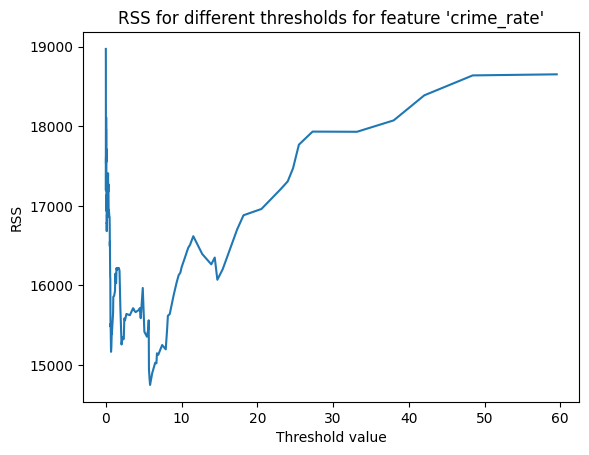

In [25]:
def find_min_RSS_demo(feature: str, x, y):
    rss_list = []
    vals = np.unique(x[feature])
    for val1, val2 in zip(vals, vals[1:]):
        threshold = (val1 + val2) / 2 # calc threshold

        left = x[x['crime_rate']<threshold] # samples left of thresh
        right = x[x['crime_rate']>=threshold] # samples right of thresh

        left_pred = np.mean(y.loc[left.index]) # left of thresh pred, avg of left samples
        right_pred = np.mean(y.loc[right.index]) # right of thresh pred, avg of right samples
        
        # residuals for left and right side
        left_res = y.loc[left.index] - left_pred
        right_res = y.loc[right.index] - right_pred

        rss_list.append((np.sum(np.array(left_res)**2) + np.sum(np.array(right_res)**2), threshold))
    return rss_list


test = find_min_RSS_demo('crime_rate', x_train, y_train)
print(f"Min RSS: {min(test)[0]} at threshold: {min(test)[1]}")
test = np.array(test)
plt.plot(test[:, 1], test[:, 0])
plt.xlabel("Threshold value")
plt.ylabel("RSS")
plt.title("RSS for different thresholds for feature 'crime_rate'")
plt.show()

In [26]:
# Regression tree
class Node:
    def __init__(self, feature: str, threshold: float, value: float, left_child, right_child) -> None:
        self.feature =  feature
        self.threshold =  threshold
        self.left_child = left_child
        self.right_child =  right_child
        self.value = value # predicted value for leaf nodes

In [27]:
class RegressionTree:
    def __init__(self):
        self.root = None

    def find_min_RSS(self, feature, x, y):
        thresh = 0
        rss = float('inf')
        vals = np.unique(x[feature])
        #vals = np.sort(vals)

        if len(vals) <= 1:
            return float('inf'), float('inf')

        # go through all possible value splits in a feature
        for val1, val2 in zip(vals, vals[1:]):
            threshold = (val1 + val2) / 2 # calc threshold based on 2 neighbouring values

            left = x[x[feature]<threshold] # samples left of thresh
            right = x[x[feature]>=threshold] # samples right of thresh

            left_pred = np.mean(y.loc[left.index]) # left of thresh pred, avg of left samples
            right_pred = np.mean(y.loc[right.index]) # right of thresh pred, avg of right samples
            
            # residuals for left and right side
            left_res = y.loc[left.index] - left_pred
            right_res = y.loc[right.index] - right_pred

            current_rss  = np.sum(np.array(left_res)**2) + np.sum(np.array(right_res)**2)

            if current_rss < rss:
                rss = current_rss
                thresh = threshold

        return rss, thresh

    def find_feature(self, x, y):
        rss = float('inf')
        thresh = 0
        feature = ''
        for feat in x.columns.to_list():
            current_rss, threshold = self.find_min_RSS(feat, x, y)
            if current_rss < rss:
                #print(feat, current_rss)
                rss = current_rss
                feature = feat
                thresh = threshold
        return feature, thresh
    
    def build_tree(self, x: pd.DataFrame, y: pd.DataFrame, depth: int, min_samples: int):
        if depth == 0 or len(x) <= min_samples:
            pred_val = np.mean(y)
            return Node(None, None, pred_val, None, None)
        
        # find data split (feature + threshold)
        feat, thresh = self.find_feature(x, y)
        #print(feat, thresh)
        # data split for children
        left_idx = x[x[feat] < thresh].index
        right_idx = x[x[feat] >= thresh].index
        
        # recursively solve children with the split data
        left = self.build_tree(x.loc[left_idx], y.loc[left_idx], depth-1, min_samples)
        right = self.build_tree(x.loc[right_idx], y.loc[right_idx], depth-1, min_samples)

        return Node(feat, thresh, None, left, right)

    def fit(self, x: pd.DataFrame, y: pd.DataFrame, depth: int = 100, min_samples: int = 5):
        self.root = self.build_tree(x, y, depth, min_samples)

    def predict(self, sample: pd.DataFrame, tree: Node) -> float:
        if tree.feature is None:
            return tree.value

        if sample[tree.feature] < tree.threshold:
            return self.predict(sample, tree.left_child)
        else:
            return self.predict(sample, tree.right_child)

    def predictions(self, x: pd.DataFrame):
        # for each sample in x, go through the reg tree and save the predicted result
        results = []
        for sample in x.index:
            pred = self.predict(x.loc[sample], self.root)
            results.append([pred])
        return np.array(results)

MSE: 20.343590776699028, R2: 0.7895923213638382


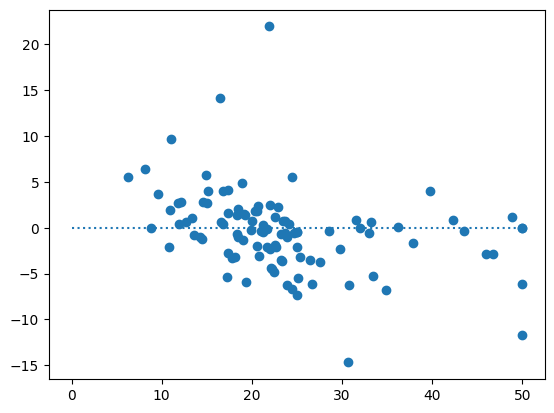

In [28]:
rt = RegressionTree()
rt.fit(x_train, y_train)
pred = rt.predictions(x_test)
print(f"MSE: {mean_squared_error(np.array(y_test), pred)}, R2: {r2_score(np.array(y_test), pred)}")
plt.scatter(np.array(y_test), pred-np.array(y_test))
plt.plot((0, 50), (0, 0), linestyle='dotted')
plt.title("Residuals plot")
plt.ylabel("Residuals")
plt.xlabel("Target value")
plt.show()

Test the regressing tree using cross-validation. Compare the cross-validation results with those you get while building a regression
tree with scikit-learn. Use the same cross-validation splits on both models.

In [29]:
def k_fold(k, X): # returns lists of indexes for folds (train and test)
    n = len(X)

    f_size = n//k

    index_list = [] # n=10, k=5, return: [(2:, :2), (:2 + 4:, 2:4), (:4 + 6:, 4:6), (:6 + 8:, 6:8), (:8, 8:)], where (train, test)

    for i in range(k):
        index_list.append(
            (list(range(0, i*f_size)) + list(range((i+1)*f_size, n)),
             list(range(i*f_size, (i+1)*f_size)))
        )

    return index_list

In [30]:
x = data.drop([data.columns.to_list()[-1]], axis=1)
y = data[['price']]

In [31]:
results_mse = []
results_r2 = []
for train, test in k_fold(5, x):
    x_train = x.loc[train]
    y_train = y.loc[train]
    x_test = x.loc[test]
    y_test = y.loc[test]

    rt = RegressionTree()
    rt.fit(x_train, y_train)
    pred = rt.predictions(x_test)

    results_mse.append(mean_squared_error(y_test, pred))
    results_r2.append(r2_score(y_test, pred))
print(f"Average MSE: {np.mean(results_mse)}, average R2: {np.mean(results_r2)}")

Average MSE: 23.761644967320258, average R2: 0.7006459035660982


In [32]:
results_mse = []
results_r2 = []
for train, test in k_fold(5, x):
    x_train = x.loc[train]
    y_train = y.loc[train]
    x_test = x.loc[test]
    y_test = y.loc[test]

    regressor = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
    pred = regressor.predict(x_test)

    results_mse.append(mean_squared_error(y_test, pred))
    results_r2.append(r2_score(y_test, pred))
print(f"Average MSE: {np.mean(results_mse)}, average R2: {np.mean(results_r2)}")

Average MSE: 30.497852941176472, average R2: 0.6223936844632085
